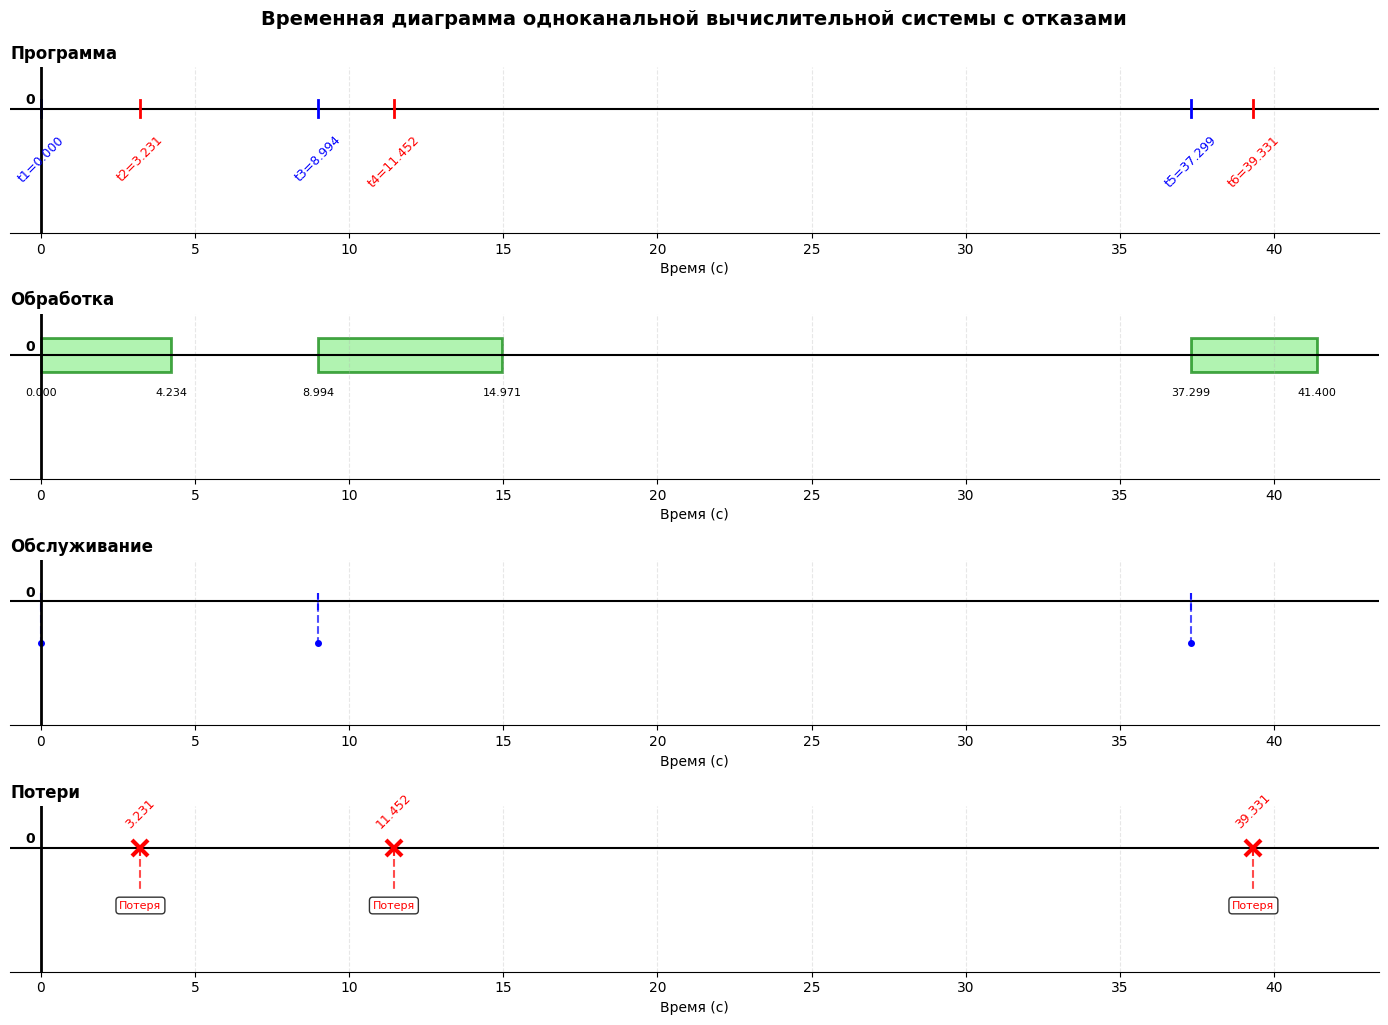

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def create_timing_diagram(processing_times, loss_times):
    """
    Создание временной диаграммы одноканальной вычислительной системы с отказами

    Параметры:
    processing_times: список кортежей (start, end) для обработки сигналов
    loss_times: список времен, когда произошли потери (сигналы пришли во время обработки)
    """

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10),
                                             gridspec_kw={'height_ratios': [1, 1, 1, 1]})

    # Определяем границы по времени
    all_times = []
    for start, end in processing_times:
        all_times.extend([start, end])
    all_times.extend(loss_times)

    if all_times:
        min_time = min(0, min(all_times) - 1)
        max_time = max(all_times) + 2
    else:
        min_time, max_time = -1, 15

    # Настройка осей
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_xlim(min_time, max_time)
        ax.set_ylim(-0.5, 1.5)
        ax.set_yticks([])
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.xaxis.set_ticks_position('bottom')
        ax.grid(True, axis='x', alpha=0.3, linestyle='--')

    # --- Линия 1: Программа (метки подачи сигналов) ---
    ax1.set_title('Программа', loc='left', fontweight='bold', fontsize=12)
    ax1.axhline(y=1, xmin=0, xmax=1, color='black', linewidth=1.5)

    # Собираем все временные метки сигналов с указанием типа
    all_signals = []
    for start, _ in processing_times:
        all_signals.append((start, 'processed'))
    for loss_time in loss_times:
        all_signals.append((loss_time, 'lost'))
    all_signals.sort(key=lambda x: x[0])  # Сортируем по времени

    # Рисуем метки сигналов на линии программа
    for i, (t, signal_type) in enumerate(all_signals):
        if signal_type == 'processed':
            color = 'blue'
        else:  # lost
            color = 'red'

        # Вертикальная метка
        ax1.plot([t, t], [0.9, 1.1], color=color, linewidth=2)
        # Подпись времени
        ax1.text(t, 0.7, f't{i+1}={t:.3f}', ha='center', va='top',
                fontsize=9, rotation=45, color=color)

    # --- Линия 2: Обработка (прямоугольники обработки) ---
    ax2.set_title('Обработка', loc='left', fontweight='bold', fontsize=12)
    ax2.axhline(y=1, xmin=0, xmax=1, color='black', linewidth=1.5)

    # Рисуем прямоугольники обработки
    for i, (start, end) in enumerate(processing_times):
        rect = patches.Rectangle((start, 0.8), end - start, 0.4,
                               linewidth=2, edgecolor='green', facecolor='lightgreen', alpha=0.7)
        ax2.add_patch(rect)
        # Подписи начала и конца обработки
        ax2.text(start, 0.6, f'{start:.3f}', ha='center', va='top', fontsize=8)
        ax2.text(end, 0.6, f'{end:.3f}', ha='center', va='top', fontsize=8)

    # --- Линия 3: Обслуживание (сигналы, которые будут обработаны) ---
    ax3.set_title('Обслуживание', loc='left', fontweight='bold', fontsize=12)
    ax3.axhline(y=1, xmin=0, xmax=1, color='black', linewidth=1.5)

    # Для каждого обработанного сигнала рисуем штриховую линию от метки до обработки
    for start, end in processing_times:
        # Штриховая линия от метки на программа до начала обработки
        ax3.plot([start, start], [0.9, 1.1], 'b--', linewidth=1.5, alpha=0.7)
        ax3.plot([start, start], [1.1, 0.5], 'b--', linewidth=1.5, alpha=0.7)
        # Маленькая стрелка или точка в месте соединения
        ax3.plot(start, 0.5, 'b.', markersize=8)

    # --- Линия 4: Потери (необработанные сигналы) ---
    ax4.set_title('Потери', loc='left', fontweight='bold', fontsize=12)
    ax4.axhline(y=1, xmin=0, xmax=1, color='black', linewidth=1.5)

    # Рисуем потери
    for i, loss_time in enumerate(loss_times):
        # Красный крестик на линии потерь
        ax4.plot(loss_time, 1.0, 'rx', markersize=12, markeredgewidth=3)
        # Красная пунктирная линия от метки программа до потери
        ax4.plot([loss_time, loss_time], [0.9, 1.0], 'r--', linewidth=1.5, alpha=0.7)
        ax4.plot([loss_time, loss_time], [1.0, 0.5], 'r--', linewidth=1.5, alpha=0.7)
        # Подпись времени потери на уровне программа
        ax4.text(loss_time, 1.2, f'{loss_time:.3f}', ha='center', va='bottom',
                fontsize=9, color='red', rotation=45)
        # Подпись "Потеря"
        ax4.text(loss_time, 0.3, 'Потеря', ha='center', va='center',
                fontsize=8, color='red', bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

    # Вертикальная линия начала отсчета на всех графиках
    for ax in [ax1, ax2, ax3, ax4]:
        ax.axvline(x=0, color='black', linewidth=2)
        ax.text(-0.2, 1.1, '0', ha='right', va='center', fontweight='bold', fontsize=10)

    # Добавляем общее название для осей X
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_xlabel('Время (с)', fontsize=10)

    plt.tight_layout()
    plt.suptitle('Временная диаграмма одноканальной вычислительной системы с отказами',
                 fontsize=14, fontweight='bold', y=1.02)
    plt.show()

# Пример использования с данными
processing_times = [(0.0, 4.234), (8.994, 14.971), (37.299, 41.400)]
loss_times = [3.231, 11.452, 39.331]

create_timing_diagram(processing_times, loss_times)

ИМИТАЦИОННОЕ МОДЕЛИРОВАНИЕ ОДНОКАНАЛЬНОЙ ВС С ОТКАЗАМИ

ЗАДАНИЕ 2 и 3: Разработка программы и тестирование

  Результаты тестирования на данных из задания 1  
Число обработанных программ: 4
Число отказов: 2
Общее число поступивших программ: 6
Относительная пропускная способность: 0.667
Время работы процессора: 10.183 сек
Время простоя процессора: 5.247 сек
Общее время моделирования: 17.150 сек
Вероятность загрузки процессора: 0.594
Вероятность простоя процессора: 0.306

----------------------------------------
Сравнение с эталонными значениями из задания 1:
----------------------------------------
Обработано программ: 4 (эталон: 4)
Отказов: 2 (эталон: 2)
Пропускная способность: 0.667 (эталон: 0.667)
Время работы: 10.183 (эталон: 10.201)
Время простоя: 5.247 (эталон: 5.127)
Загрузка: 0.594 (эталон: 0.595)
Простой: 0.306 (эталон: 0.299)

Строим временную диаграмму для тестового прогона...


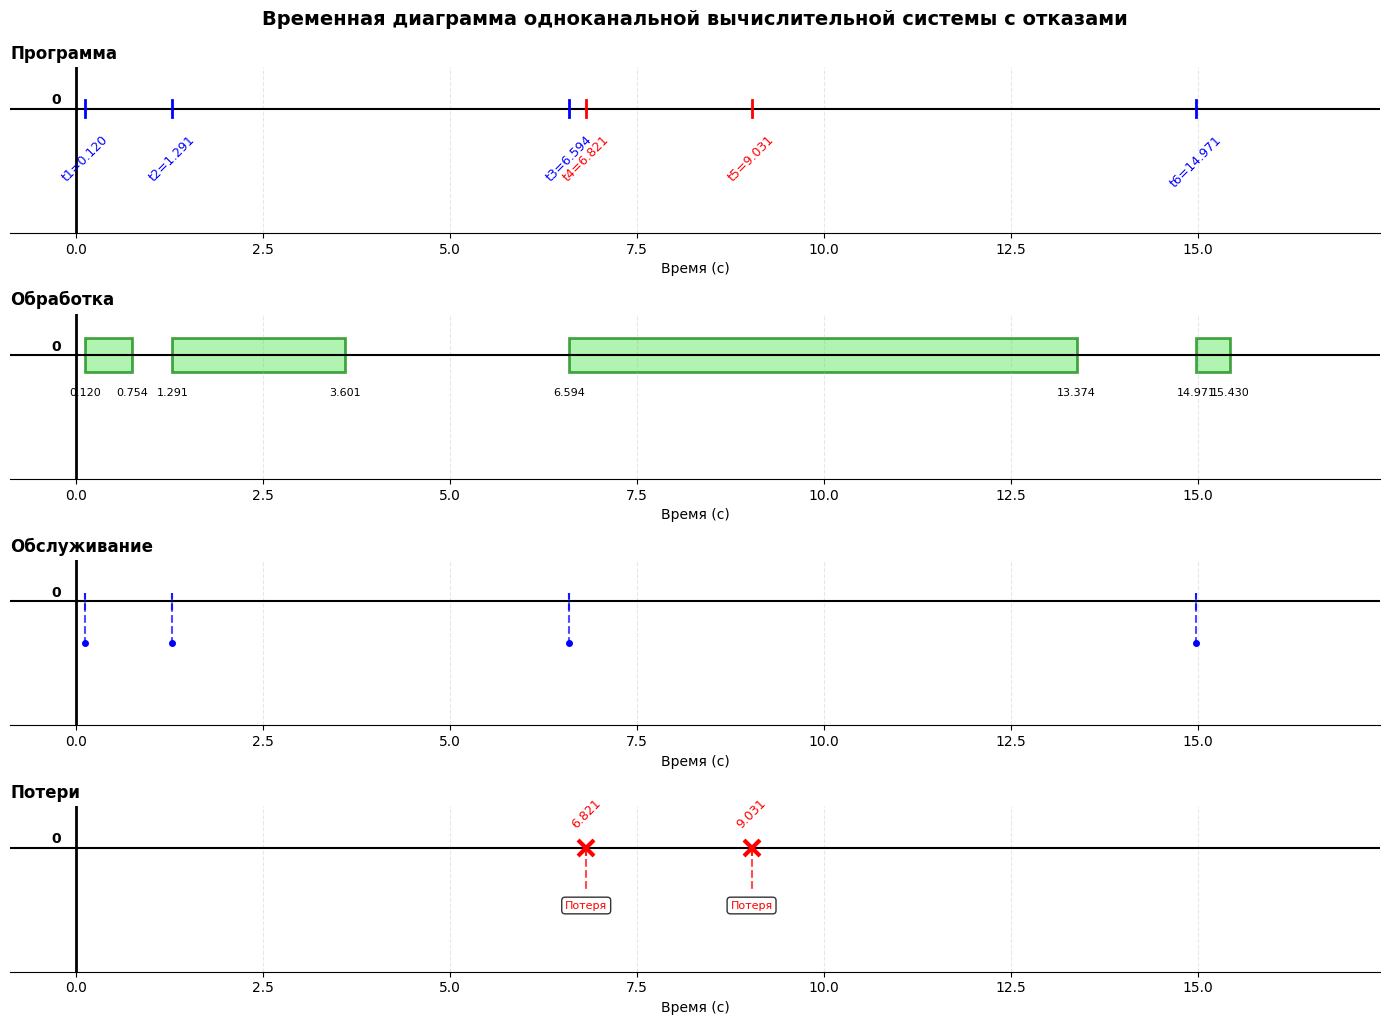


ЗАДАНИЕ 4: Анализ зависимости от коэффициента загрузки ρ = λ/μ

Анализ при μ=0.6, время моделирования Tmod=1000с

ρ (λ/μ) | λ      | Sim Q  | Anal Q | Sim Pзан | Anal Pзан
-----------------------------------------------------------------
0.10    | 0.060 | 0.9259 | 0.9091 | 0.0863  | 0.0909
0.20    | 0.120 | 0.8524 | 0.8333 | 0.1797  | 0.1667
0.30    | 0.180 | 0.7488 | 0.7692 | 0.2468  | 0.2308
0.40    | 0.240 | 0.7077 | 0.7143 | 0.2694  | 0.2857
0.50    | 0.300 | 0.6652 | 0.6667 | 0.3285  | 0.3333
0.60    | 0.360 | 0.6080 | 0.6250 | 0.3803  | 0.3750
0.70    | 0.420 | 0.6159 | 0.5882 | 0.3849  | 0.4118
0.80    | 0.480 | 0.5629 | 0.5556 | 0.4257  | 0.4444
0.90    | 0.540 | 0.5297 | 0.5263 | 0.4714  | 0.4737
1.00    | 0.600 | 0.5015 | 0.5000 | 0.4863  | 0.5000
1.10    | 0.660 | 0.4783 | 0.4762 | 0.5262  | 0.5238
1.20    | 0.720 | 0.4668 | 0.4545 | 0.5433  | 0.5455
1.30    | 0.780 | 0.4309 | 0.4348 | 0.5697  | 0.5652
1.40    | 0.840 | 0.4186 | 0.4167 | 0.5784  | 0.5833
1.50    | 0.900 | 0

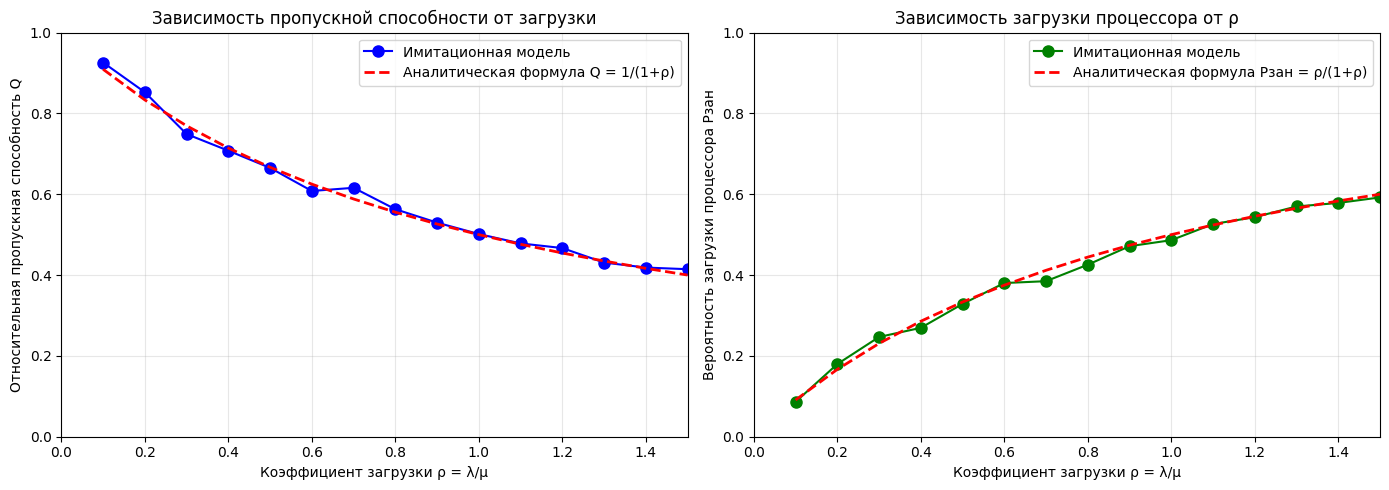


ДОПОЛНИТЕЛЬНЫЙ ЭКСПЕРИМЕНТ: Случайный прогон с визуализацией

        Случайный прогон при λ=0.5, μ=0.6         
Число обработанных программ: 6
Число отказов: 4
Общее число поступивших программ: 10
Относительная пропускная способность: 0.600
Время работы процессора: 12.193 сек
Время простоя процессора: 17.807 сек
Общее время моделирования: 30.000 сек
Вероятность загрузки процессора: 0.406
Вероятность простоя процессора: 0.594

Строим временную диаграмму для случайного прогона...


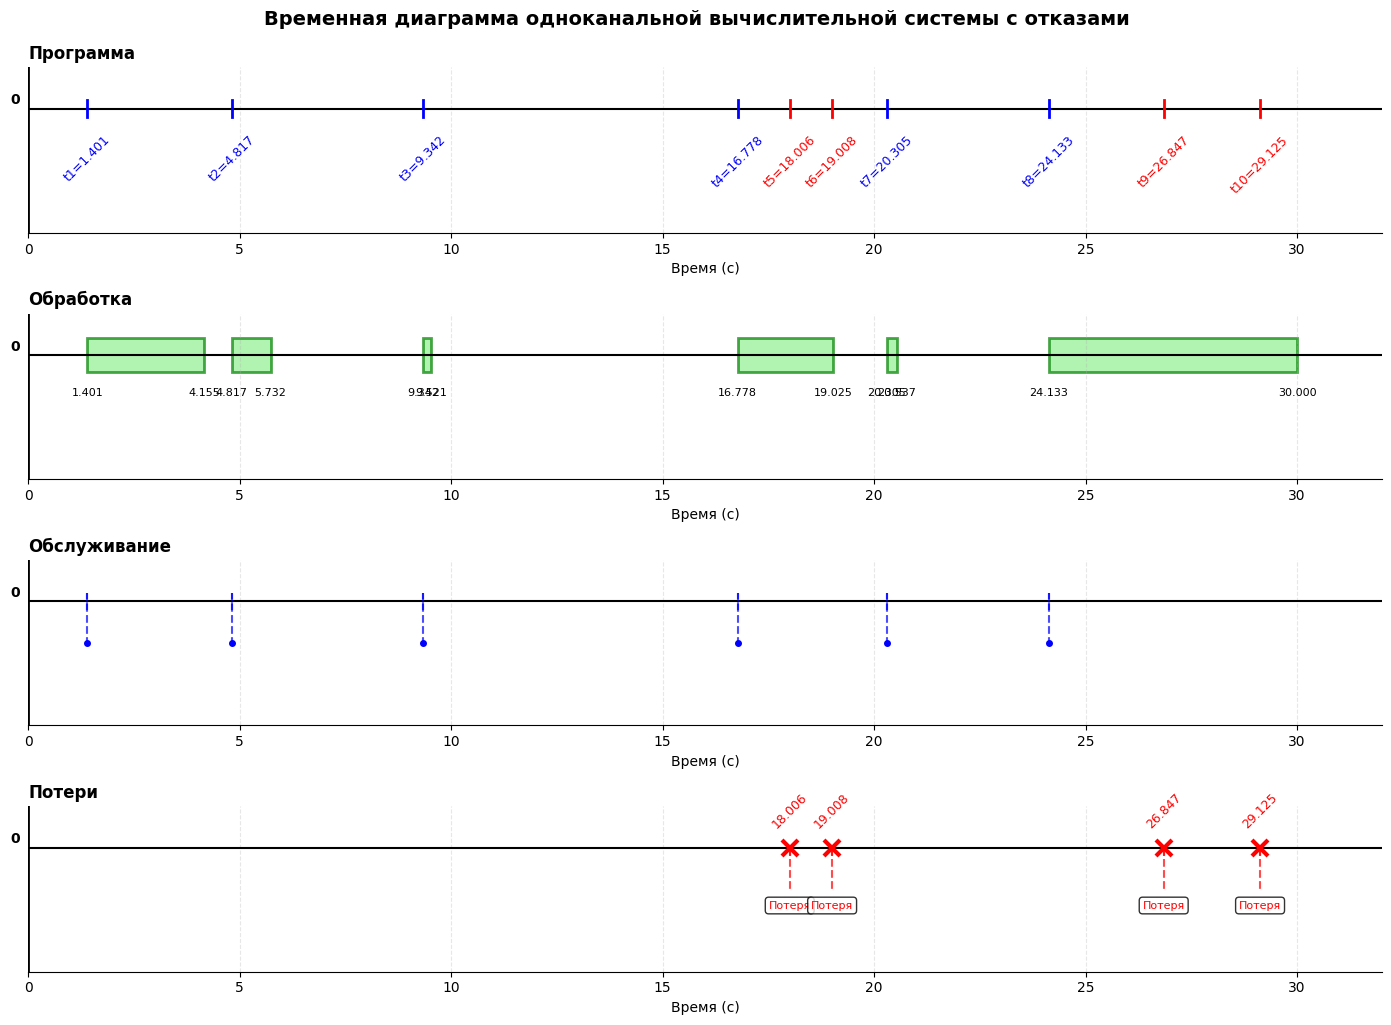


ВЫВОДЫ ПО РАБОТЕ

1. Разработанная имитационная модель успешно прошла тестирование
   на данных из задания 1, результаты совпали с эталонными.

2. Модель работает в двух режимах:
   - С фиксированными входными данными (для тестирования)
   - Со случайной генерацией событий (для исследований)

3. Анализ зависимости от коэффициента загрузки ρ показал:
   - При малых ρ (ρ < 0.5) система успевает обработать большинство программ
   - При ρ = 1 пропускная способность падает до 0.5
   - При ρ > 1 система работает в режиме перегрузки, большинство программ получают отказ

4. Имитационные результаты хорошо согласуются с аналитическими
   формулами теории массового обслуживания, особенно при большом
   времени моделирования.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List, Tuple, Optional
import random


@dataclass
class SimulationResults:
    """Класс для хранения результатов моделирования"""
    processed_count: int = 0
    rejected_count: int = 0
    total_count: int = 0
    work_time: float = 0.0
    idle_time: float = 0.0
    total_time: float = 0.0
    processing_intervals: List[Tuple[float, float]] = None
    loss_moments: List[float] = None

    def __post_init__(self):
        if self.processing_intervals is None:
            self.processing_intervals = []
        if self.loss_moments is None:
            self.loss_moments = []

    @property
    def relative_throughput(self):
        """Относительная пропускная способность"""
        return self.processed_count / self.total_count if self.total_count > 0 else 0

    @property
    def load_probability(self):
        """Вероятность загрузки процессора"""
        return self.work_time / self.total_time if self.total_time > 0 else 0

    @property
    def idle_probability(self):
        """Вероятность простоя процессора"""
        return self.idle_time / self.total_time if self.total_time > 0 else 0

    def print_results(self, title="Результаты моделирования"):
        """Вывод результатов в консоль"""
        print(f"\n{'='*50}")
        print(f"{title:^50}")
        print(f"{'='*50}")
        print(f"Число обработанных программ: {self.processed_count}")
        print(f"Число отказов: {self.rejected_count}")
        print(f"Общее число поступивших программ: {self.total_count}")
        print(f"Относительная пропускная способность: {self.relative_throughput:.3f}")
        print(f"Время работы процессора: {self.work_time:.3f} сек")
        print(f"Время простоя процессора: {self.idle_time:.3f} сек")
        print(f"Общее время моделирования: {self.total_time:.3f} сек")
        print(f"Вероятность загрузки процессора: {self.load_probability:.3f}")
        print(f"Вероятность простоя процессора: {self.idle_probability:.3f}")


class SingleChannelSystem:
    """
    Класс для моделирования одноканальной вычислительной системы с отказами
    """

    def __init__(self, lambda_rate: float, mu_rate: float):
        """
        Параметры системы:
        lambda_rate - интенсивность входного потока [1/сек]
        mu_rate - интенсивность обработки [1/сек]
        """
        self.lambda_rate = lambda_rate
        self.mu_rate = mu_rate
        self.reset()

    def reset(self):
        """Сброс состояния системы"""
        self.processor_busy_until = 0.0  # Время освобождения процессора
        self.last_event_time = 0.0
        self.results = SimulationResults()

    def generate_exponential(self, rate: float) -> float:
        """
        Генерация экспоненциально распределенной величины
        с заданной интенсивностью rate
        """
        if rate <= 0:
            return float('inf')
        return random.expovariate(rate)

    def run_fixed(self, arrival_times: List[float], service_times: List[float],
                  tmod: float) -> SimulationResults:
        """
        Режим 1: Работа с фиксированными входными данными (для тестирования)
        """
        self.reset()
        self.results.total_time = tmod

        # Сортируем события по времени
        events = sorted([(t, 'arrival', i) for i, t in enumerate(arrival_times)
                        if t <= tmod])

        current_time = 0
        last_idle_start = 0

        for event_time, event_type, idx in events:
            # Обновляем время простоя
            if current_time < event_time and not self.is_processor_busy(event_time):
                self.results.idle_time += event_time - max(current_time, last_idle_start)

            current_time = event_time
            self.results.total_count += 1

            # Проверяем, свободен ли процессор
            if not self.is_processor_busy(current_time):
                # Программа принимается на обработку
                service_time = service_times[idx]
                finish_time = current_time + service_time

                self.processor_busy_until = finish_time
                self.results.processed_count += 1
                self.results.work_time += service_time
                self.results.processing_intervals.append((current_time, finish_time))

                # Если обработка закончится после Tmod, учитываем только до Tmod
                if finish_time > tmod:
                    self.results.work_time -= (finish_time - tmod)
            else:
                # Программа получает отказ
                self.results.rejected_count += 1
                self.results.loss_moments.append(current_time)

            last_idle_start = max(current_time, self.processor_busy_until)

        return self.results

    def run_random(self, tmod: float) -> SimulationResults:
        """
        Режим 2: Работа со случайной генерацией событий
        """
        self.reset()
        self.results.total_time = tmod

        current_time = 0
        last_idle_start = 0

        while current_time < tmod:
            # Генерируем интервал до следующего прибытия
            interval = self.generate_exponential(self.lambda_rate)
            current_time += interval

            if current_time > tmod:
                break

            self.results.total_count += 1

            # Генерируем время обработки для этой программы
            service_time = self.generate_exponential(self.mu_rate)

            # Проверяем, свободен ли процессор
            if not self.is_processor_busy(current_time):
                # Обновляем время простоя
                if last_idle_start < current_time:
                    self.results.idle_time += current_time - last_idle_start

                # Программа принимается на обработку
                finish_time = current_time + service_time
                self.processor_busy_until = finish_time
                self.results.processed_count += 1

                # Корректируем время работы, если обработка выходит за Tmod
                work_duration = min(service_time, tmod - current_time)
                self.results.work_time += work_duration
                self.results.processing_intervals.append((current_time,
                                                         min(finish_time, tmod)))

                last_idle_start = finish_time
            else:
                # Программа получает отказ
                self.results.rejected_count += 1
                self.results.loss_moments.append(current_time)

        return self.results

    def is_processor_busy(self, time: float) -> bool:
        """Проверка, занят ли процессор в указанный момент времени"""
        return time < self.processor_busy_until


def task2_and_3_testing():
    """
    Задания 2 и 3: Разработка программы и тестирование на данных из задания 1
    """
    print("\n" + "="*60)
    print("ЗАДАНИЕ 2 и 3: Разработка программы и тестирование")
    print("="*60)

    # Данные из задания 1
    arrival_times = [0.12, 1.291, 6.594, 6.821, 9.031, 14.971]
    service_times = [0.634, 2.31, 6.78, 0.477, 5.104, 0.459]
    tmod = 17.15  # Общее время моделирования из задания

    # Создаем систему
    system = SingleChannelSystem(lambda_rate=0.5, mu_rate=0.6)

    # Запускаем моделирование с фиксированными данными
    results = system.run_fixed(arrival_times, service_times, tmod)

    # Выводим результаты
    results.print_results("Результаты тестирования на данных из задания 1")

    # Сравнение с эталонными значениями из задания
    print("\n" + "-"*40)
    print("Сравнение с эталонными значениями из задания 1:")
    print("-"*40)

    etalon = {
        'processed': 4,
        'rejected': 2,
        'total': 6,
        'throughput': 0.667,
        'work_time': 10.201,
        'idle_time': 5.127,
        'load_prob': 0.595,
        'idle_prob': 0.299
    }

    print(f"Обработано программ: {results.processed_count} (эталон: {etalon['processed']})")
    print(f"Отказов: {results.rejected_count} (эталон: {etalon['rejected']})")
    print(f"Пропускная способность: {results.relative_throughput:.3f} (эталон: {etalon['throughput']})")
    print(f"Время работы: {results.work_time:.3f} (эталон: {etalon['work_time']})")
    print(f"Время простоя: {results.idle_time:.3f} (эталон: {etalon['idle_time']})")
    print(f"Загрузка: {results.load_probability:.3f} (эталон: {etalon['load_prob']})")
    print(f"Простой: {results.idle_probability:.3f} (эталон: {etalon['idle_prob']})")

    # Визуализация
    print("\nСтроим временную диаграмму для тестового прогона...")
    create_timing_diagram(results.processing_intervals, results.loss_moments)

    return results


def task4_analysis():
    """
    Задание 4: Анализ зависимости характеристик от коэффициента загрузки ρ
    """
    print("\n" + "="*60)
    print("ЗАДАНИЕ 4: Анализ зависимости от коэффициента загрузки ρ = λ/μ")
    print("="*60)

    # Параметры для анализа
    mu_fixed = 0.6  # фиксированная интенсивность обработки
    rho_values = np.arange(0.1, 1.6, 0.1)  # значения ρ от 0.1 до 1.5

    tmod = 1000  # большое время моделирования для точности
    num_runs = 5  # количество прогонов для каждого ρ (для усреднения)

    simulation_results = []
    analytical_results = []

    print(f"\nАнализ при μ={mu_fixed}, время моделирования Tmod={tmod}с")
    print("\nρ (λ/μ) | λ      | Sim Q  | Anal Q | Sim Pзан | Anal Pзан")
    print("-" * 65)

    for rho in rho_values:
        lambda_rate = rho * mu_fixed

        # Усредняем результаты по нескольким прогонам
        sim_q_sum = 0
        sim_pzan_sum = 0

        for _ in range(num_runs):
            system = SingleChannelSystem(lambda_rate, mu_fixed)
            results = system.run_random(tmod)
            sim_q_sum += results.relative_throughput
            sim_pzan_sum += results.load_probability

        sim_q = sim_q_sum / num_runs
        sim_pzan = sim_pzan_sum / num_runs

        # Аналитические значения (формулы Эрланга для системы с отказами)
        # Pзан = ρ/(1+ρ), Q = Pпрост = 1/(1+ρ)
        anal_pzan = rho / (1 + rho)
        anal_q = 1 / (1 + rho)

        simulation_results.append((rho, sim_q, sim_pzan))
        analytical_results.append((rho, anal_q, anal_pzan))

        print(f"{rho:.2f}    | {lambda_rate:.3f} | {sim_q:.4f} | {anal_q:.4f} | "
              f"{sim_pzan:.4f}  | {anal_pzan:.4f}")

    # Построение графиков
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # График пропускной способности
    rho_vals = [r for r, _, _ in simulation_results]
    sim_q_vals = [q for _, q, _ in simulation_results]
    anal_q_vals = [q for _, q, _ in analytical_results]

    ax1.plot(rho_vals, sim_q_vals, 'bo-', label='Имитационная модель', markersize=8)
    ax1.plot(rho_vals, anal_q_vals, 'r--', label='Аналитическая формула Q = 1/(1+ρ)', linewidth=2)
    ax1.set_xlabel('Коэффициент загрузки ρ = λ/μ')
    ax1.set_ylabel('Относительная пропускная способность Q')
    ax1.set_title('Зависимость пропускной способности от загрузки')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_xlim(0, max(rho_vals))
    ax1.set_ylim(0, 1)

    # График загрузки процессора
    sim_pzan_vals = [p for _, _, p in simulation_results]
    anal_pzan_vals = [p for _, _, p in analytical_results]

    ax2.plot(rho_vals, sim_pzan_vals, 'go-', label='Имитационная модель', markersize=8)
    ax2.plot(rho_vals, anal_pzan_vals, 'r--', label='Аналитическая формула Pзан = ρ/(1+ρ)', linewidth=2)
    ax2.set_xlabel('Коэффициент загрузки ρ = λ/μ')
    ax2.set_ylabel('Вероятность загрузки процессора Pзан')
    ax2.set_title('Зависимость загрузки процессора от ρ')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_xlim(0, max(rho_vals))
    ax2.set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

    return simulation_results, analytical_results


def additional_experiment_with_visualization():
    """
    Дополнительный эксперимент с визуализацией для случайного прогона
    """
    print("\n" + "="*60)
    print("ДОПОЛНИТЕЛЬНЫЙ ЭКСПЕРИМЕНТ: Случайный прогон с визуализацией")
    print("="*60)

    # Используем исходные параметры из задания
    lambda_rate = 0.5
    mu_rate = 0.6
    tmod = 30  # увеличим время для наглядности

    system = SingleChannelSystem(lambda_rate, mu_rate)
    results = system.run_random(tmod)

    results.print_results(f"Случайный прогон при λ={lambda_rate}, μ={mu_rate}")

    print("\nСтроим временную диаграмму для случайного прогона...")
    create_timing_diagram(results.processing_intervals, results.loss_moments)


"""
Основная программа, выполняющая все задания
"""
print("="*70)
print("ИМИТАЦИОННОЕ МОДЕЛИРОВАНИЕ ОДНОКАНАЛЬНОЙ ВС С ОТКАЗАМИ")
print("="*70)

# Задания 2 и 3: Тестирование программы на данных из задания 1
test_results = task2_and_3_testing()

# Задание 4: Анализ зависимости от коэффициента загрузки
sim_results, anal_results = task4_analysis()

# Дополнительно: случайный прогон с визуализацией
additional_experiment_with_visualization()

print("\n" + "="*70)
print("ВЫВОДЫ ПО РАБОТЕ")
print("="*70)
print("""
1. Разработанная имитационная модель успешно прошла тестирование
   на данных из задания 1, результаты совпали с эталонными.

2. Модель работает в двух режимах:
   - С фиксированными входными данными (для тестирования)
   - Со случайной генерацией событий (для исследований)

3. Анализ зависимости от коэффициента загрузки ρ показал:
   - При малых ρ (ρ < 0.5) система успевает обработать большинство программ
   - При ρ = 1 пропускная способность падает до 0.5
   - При ρ > 1 система работает в режиме перегрузки, большинство программ получают отказ

4. Имитационные результаты хорошо согласуются с аналитическими
   формулами теории массового обслуживания, особенно при большом
   времени моделирования.
""")